# import

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 시각화 스타일 설정
sns.set_context('notebook')  # 노트북에 최적화된 크기와 폰트

# 한글 깨짐 방지 (윈도우)
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

# 그래프에서 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨기기 (필요시)
import warnings
warnings.filterwarnings('ignore')

# file

In [3]:
# 엑셀 파일 경로
file_path = './data/knhanes.xlsx'

# 엑셀 파일 불러오기 (기본 첫 번째 시트)
df = pd.read_excel(file_path)

# 특정 시트 불러오기
# df = pd.read_excel(file_path, sheet_name='Sheet1')

print(df.head())

         mod_d          ID    ID_fam  year  region  town_t  apt_t   psu  sex  \
0  2024.12.10.  YA84208301  YA842083  2023       1       1      2  YA84    1   
1  2024.12.10.  YA84208302  YA842083  2023       1       1      2  YA84    2   
2  2024.12.10.  YA84212402  YA842124  2023       1       1      2  YA84    2   
3  2024.12.10.  YA84212404  YA842124  2023       1       1      2  YA84    2   
4  2024.12.10.  YA84242702  YA842427  2023       1       1      2  YA84    1   

   age  ...      N_CAROT     N_RETIN      N_B1      N_B2     N_NIAC  \
0   75  ...  2704.555129   22.304061  0.689636  0.911565   4.519287   
1   70  ...  1190.505880   44.455061  1.010501  0.839130   6.333379   
2   42  ...  6752.011600  364.273465  1.839332  3.257774  24.363661   
3    9  ...  2213.362823  893.834459  1.873845  2.962366  22.194257   
4   43  ...  2136.906180  309.283062  1.086500  2.021552  10.360013   

     N_FOLATE     N_VITC  LF_SECUR_Y  LF_BUYER  LF_SAFE  
0  108.528994  29.390490         1

# data

### DE1_dg : 의사 진단 당뇨 유무 (0=없음·1=있음)

In [4]:
# DE1_dg 자료형과 고유값, 개수 확인
print(df['DE1_dg'].dtype)
print(df['DE1_dg'].value_counts(dropna=False))

# 데이터프레임 행 개수 확인
print("데이터 행 수:", len(df))

# 중복 행 개수 확인
print("중복 행 개수:", df.duplicated().sum())

float64
DE1_dg
0.0    5178
8.0    1022
1.0     728
NaN       1
Name: count, dtype: int64
데이터 행 수: 6929
중복 행 개수: 0


In [5]:
df_de1 = df[df['DE1_dg'].isin([1])]
diagnosed_count = df_de1['DE1_dg'].sum()
print(f"의사 진단 당뇨병 환자 수 (0,1 필터링): {diagnosed_count}")

의사 진단 당뇨병 환자 수 (0,1 필터링): 728.0


### HE_DM_HbA1c : HbA1c·공복혈당·진단 정보로 산출된 3단계 당뇨 상태 (1=정상‧2=전단계‧3=당뇨)

In [6]:
status_map = {1: '정상', 2: '당뇨병 전단계', 3: '당뇨병'}

# 결측치 아닌 데이터 개수 (상태별)
counts = df['HE_DM_HbA1c'].dropna().map(status_map).value_counts()

# 결측치 개수
missing_count = df['HE_DM_HbA1c'].isnull().sum()

print("HE_DM_HbA1c 상태별 개수:")
print(counts)
print(f"\nHE_DM_HbA1c 결측치 개수: {missing_count}")

HE_DM_HbA1c 상태별 개수:
HE_DM_HbA1c
정상         2925
당뇨병 전단계    1719
당뇨병         860
Name: count, dtype: int64

HE_DM_HbA1c 결측치 개수: 1425


### HE_glu : 공복혈당

In [7]:
def glu_status(glu):
    if pd.isna(glu):
        return None
    elif glu < 100:
        return '정상'
    elif 100 <= glu <= 125:
        return '당뇨병 전단계'
    else:
        return '당뇨병'

df['glu_status'] = df['HE_glu'].apply(glu_status)

# 상태별 개수 (결측 제외)
counts = df['glu_status'].value_counts(dropna=True)

# 결측치 개수
missing_count = df['HE_glu'].isnull().sum()

print("공복혈당 기준 당뇨 상태별 개수:")
print(counts)
print(f"\n공복혈당 결측치 개수: {missing_count}")

공복혈당 기준 당뇨 상태별 개수:
glu_status
정상         4015
당뇨병 전단계    1661
당뇨병         508
Name: count, dtype: int64

공복혈당 결측치 개수: 745


### HE_HbA1c : 당화혈색소

In [8]:
import pandas as pd

def hba1c_status(hba1c):
    if pd.isna(hba1c):
        return None
    elif hba1c < 5.7:
        return '정상'
    elif 5.7 <= hba1c <= 6.4:
        return '당뇨병 전단계'
    else:
        return '당뇨병'

df['hba1c_status'] = df['HE_HbA1c'].apply(hba1c_status)

# 상태별 개수 (결측 제외)
counts = df['hba1c_status'].value_counts(dropna=True)

# 결측치 개수
missing_count = df['HE_HbA1c'].isnull().sum()

print("당화혈색소 기준 당뇨 상태별 개수:")
print(counts)
print(f"\n당화혈색소 결측치 개수: {missing_count}")


당화혈색소 기준 당뇨 상태별 개수:
hba1c_status
정상         4232
당뇨병 전단계    1399
당뇨병         534
Name: count, dtype: int64

당화혈색소 결측치 개수: 764


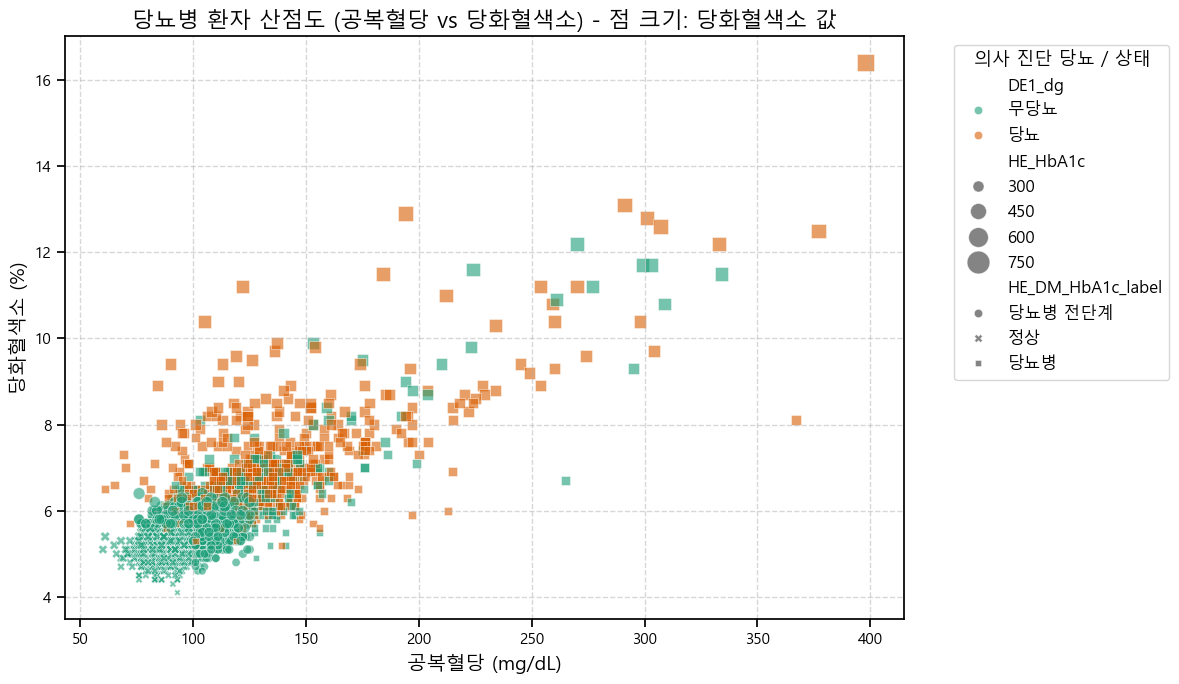

In [9]:
# 결측치 제거
df_plot = df.dropna(subset=['DE1_dg', 'HE_DM_HbA1c', 'HE_glu', 'HE_HbA1c'])

# 라벨 처리
df_plot['DE1_dg'] = df_plot['DE1_dg'].astype(int).map({0: '무당뇨', 1: '당뇨'})
status_map = {1: '정상', 2: '당뇨병 전단계', 3: '당뇨병'}
df_plot['HE_DM_HbA1c_label'] = df_plot['HE_DM_HbA1c'].map(status_map)

# 점 크기 조절 (당화혈색소 값 활용)
# 크기가 너무 크거나 작지 않게 스케일 조정
size_scale = 50
sizes = df_plot['HE_HbA1c'] * size_scale

plt.figure(figsize=(12, 7))

palette = sns.color_palette("Dark2", n_colors=2)

sns.scatterplot(
    data=df_plot,
    x='HE_glu',
    y='HE_HbA1c',
    hue='DE1_dg',
    style='HE_DM_HbA1c_label',
    palette=palette,
    size=sizes,
    sizes=(20, 300),  # 최소, 최대 점 크기 지정
    alpha=0.6
)

plt.title('당뇨병 환자 산점도 (공복혈당 vs 당화혈색소) - 점 크기: 당화혈색소 값', fontsize=16)
plt.xlabel('공복혈당 (mg/dL)', fontsize=14)
plt.ylabel('당화혈색소 (%)', fontsize=14)
plt.legend(title='의사 진단 당뇨 / 상태', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### DE1_dg & HE_DM_HbA1c 

1. DE1_dg 가 1 (의사 진단 당뇨 있음) 이고,
2. HE_DM_HbA1c 가 3 (당뇨병 상태)인 사람

In [17]:
# 두 컬럼 모두 당뇨인 사람
both_diabetes = df[(df['DE1_dg'] == 1) & (df['HE_DM_HbA1c'] == 3)]
count_both = len(both_diabetes)

# DE1_dg 당뇨인데 HE_DM_HbA1c 당뇨 아닌 사람
de1_only = df[(df['DE1_dg'] == 1) & (df['HE_DM_HbA1c'] != 3)]
count_de1_only = len(de1_only)

# HE_DM_HbA1c 당뇨인데 DE1_dg 당뇨 아닌 사람
he_only = df[(df['HE_DM_HbA1c'] == 3) & (df['DE1_dg'] != 1)]
count_he_only = len(he_only)

print(f"두 컬럼 모두 당뇨인 사람 수: {count_both}")
print(f"의사 진단 당뇨이지만 HE_DM_HbA1c 당뇨 아닌 사람 수: {count_de1_only}")
print(f"HE_DM_HbA1c 당뇨이지만 의사 진단 당뇨 아닌 사람 수: {count_he_only}")

두 컬럼 모두 당뇨인 사람 수: 666
의사 진단 당뇨이지만 HE_DM_HbA1c 당뇨 아닌 사람 수: 62
HE_DM_HbA1c 당뇨이지만 의사 진단 당뇨 아닌 사람 수: 194


결측치 갯수

In [ ]:
# DE1_dg 결측치 개수
missing_de1 = df['DE1_dg'].isnull().sum()

# HE_DM_HbA1c 결측치 개수
missing_he = df['HE_DM_HbA1c'].isnull().sum()

# 둘 다 결측인 경우
missing_both = df[df['DE1_dg'].isnull() & df['HE_DM_HbA1c'].isnull()]
count_missing_both = len(missing_both)

print(f"DE1_dg 결측치 개수: {missing_de1}")
print(f"HE_DM_HbA1c 결측치 개수: {missing_he}")
print(f"두 컬럼 모두 결측인 경우 수: {count_missing_both}")

DE1_dg 결측치 개수: 1
HE_DM_HbA1c 결측치 개수: 1425
두 컬럼 모두 결측인 경우 수: 1
